# 선형 회귀
- k 최근접 이웃은 새로운 샘플이 훈련된 데이터의 범위를 벗어나게 된다면 이상하게 예측할 수도 있다.
- 그래서 하나의 직선을 만들어서 데이터를 제일 잘 표현할 수 있는 것을 찾아낸다.
- y = a * x + b 형식이다.

In [66]:
import pandas as pd
df = pd.read_csv('data/Fish.csv')

In [67]:
con = df['Species'] == 'Perch'
p_data = df[con]

p_length = p_data[['Length2']]
p_weight = p_data[['Weight']]

In [68]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(p_length, p_weight)

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [70]:
lr.score(test_input, test_target)

0.9096502556058399

In [71]:
lr.score(train_input, train_target)

0.9212127952636411

In [72]:
lr.predict([[100]])

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3087.40841679]])

In [86]:
# ax + b 형식에서 a, 가중치
print(lr.coef_[0])

[37.57537573]


In [84]:
# ax + b 형식에서 b
print(lr.intercept_)

[-670.12915592]


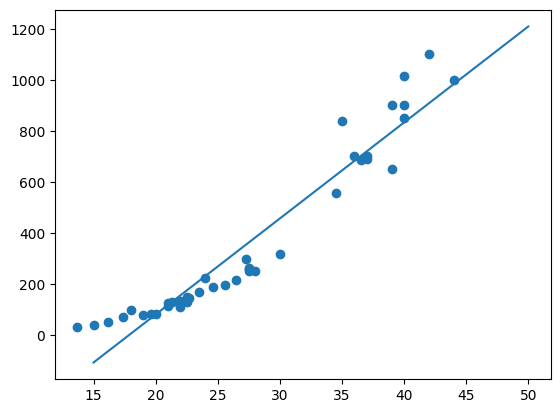

In [90]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_[0] + lr.intercept_ , 50 * lr.coef_[0] + lr.intercept_])

In [91]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9212127952636411
0.9096502556058399


In [92]:
lr.predict([[100]])

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3087.40841679]])

# 다항 회귀
- 이차 방정식을 이용한 곡선을 통해 좀 더 정확도를 높히는 방법이다.
- 그렇게 하려면 훈련, 테스트 값을 제곱해줘야한다.
- y = a * (값 ** 2) + b * 값 + c

In [108]:
# 다항 회귀
train_input['Length2_poly'] = train_input[['Length2']] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2

In [109]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [110]:
lr.score(test_input, test_target)

0.9863641906584841

In [111]:
lr.predict([[2, 4]])

C:\Users\seong\OneDrive - 한성대학교\바탕 화면\공부\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[141.7349144]])

In [112]:
# y = a * (값 ** 2) + b * 값 + c에서 a, b
lr.coef_

array([[-27.08445913,   1.11078525]])

In [113]:
# y = a * (값 ** 2) + b * 값 + c에서 c
lr.intercept_

array([191.46069164])

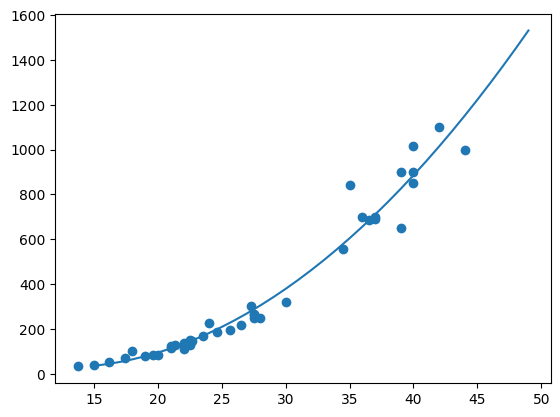

In [115]:
# 산점도와 곡선

import matplotlib.pyplot as plt
import numpy as np
point = np.arange(15, 50)
plt.scatter(train_input['Length2'], train_target)
plt.plot(point, (float(lr.coef_[0][1]) * point ** 2) + (float(lr.coef_[0][0]) * point) + float(lr.intercept_[0]))

In [119]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9638298918898733
0.9863641906584841
